In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sqlite3; print(sqlite3.version)

2.6.0


# Establishing connection & Cursor creation

In [4]:
conn = sqlite3.connect('travel.sqlite')
cursor = conn.cursor()

# Extracting all Tables

In [5]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
print('List of Tables in Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables in Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Extracting and saving all tables in their respective data frames

In [6]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data",conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [7]:
airports_data = pd.read_sql_query("select * from airports_data",conn)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [8]:
boarding_passes = pd.read_sql_query("select * from boarding_passes",conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [9]:
bookings = pd.read_sql_query("select * from bookings",conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [10]:
flights = pd.read_sql_query("select * from flights",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [11]:
seats = pd.read_sql_query("select * from seats",conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [12]:
ticket_flights = pd.read_sql_query("select * from ticket_flights",conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [13]:
tickets = pd.read_sql_query("select * from tickets",conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


# Analysis of Datatypes of all Tables

In [15]:
for table in table_list:
    print("\ntable",table)
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for columns in column_info.fetchall():
        print(columns[0:3])


table aircrafts_data
(0, 'aircraft_code', 'character(3)')
(1, 'model', 'jsonb')
(2, 'range', 'INTEGER')

table airports_data
(0, 'airport_code', 'character(3)')
(1, 'airport_name', 'jsonb')
(2, 'city', 'jsonb')
(3, 'coordinates', 'point')
(4, 'timezone', 'TEXT')

table boarding_passes
(0, 'ticket_no', 'character(13)')
(1, 'flight_id', 'INTEGER')
(2, 'boarding_no', 'INTEGER')
(3, 'seat_no', 'character varying(4)')

table bookings
(0, 'book_ref', 'character(6)')
(1, 'book_date', 'timestamp with time zone')
(2, 'total_amount', 'numeric(10,2)')

table flights
(0, 'flight_id', 'INTEGER')
(1, 'flight_no', 'character(6)')
(2, 'scheduled_departure', 'timestamp with time zone')
(3, 'scheduled_arrival', 'timestamp with time zone')
(4, 'departure_airport', 'character(3)')
(5, 'arrival_airport', 'character(3)')
(6, 'status', 'character varying(20)')
(7, 'aircraft_code', 'character(3)')
(8, 'actual_departure', 'timestamp with time zone')
(9, 'actual_arrival', 'timestamp with time zone')

table sea

#

# Finding Null values in all tables

In [16]:
for table in table_list:
    print("\ntable",table)
    df_table = pd.read_sql_query(f"select * from {table}",conn)
    print(df_table.isnull().sum())


table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


#

# Basic Analysis

**Q-1 : How many planes has more than 100 seats ??**

In [17]:
pd.read_sql_query("""SELECT aircraft_code, count(*) as num_seats FROM seats
                    GROUP BY aircraft_code HAVING num_seats > 100 ORDER BY 2 DESC""",conn)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


#

**Q-2 : How number of ticket booked and amount earned changed with Time??**

In [18]:
booked_tickets = pd.read_sql_query("""SELECT * FROM tickets 
                    INNER JOIN bookings ON tickets.book_ref = bookings.book_ref""",conn)

booked_tickets['book_date'] = pd.to_datetime(booked_tickets['book_date'])
booked_tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [19]:
# Extracting Date from book_date column 

booked_tickets['date'] = booked_tickets['book_date'].dt.date
booked_tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [20]:
# Grouping on the basis of date
x = booked_tickets.groupby('date')[["ticket_no"]].count()
x.head()

,ticket_no
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266


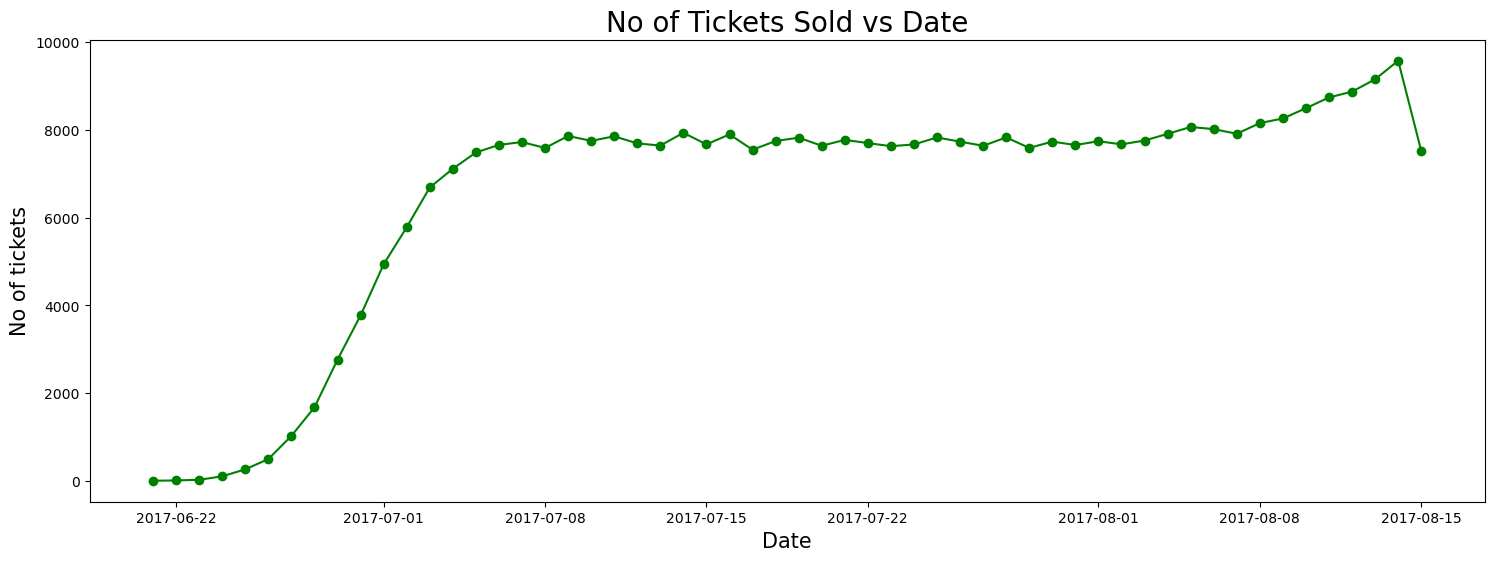

In [132]:
plt.figure(figsize = (18,6))
plt.plot(x.index,x['ticket_no'],marker = 'o', color = 'green')
plt.title("No of Tickets Sold vs Date", fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('No of tickets',fontsize = 15)
plt.show()

In [134]:
bookings = pd.read_sql_query("""SELECT * FROM bookings""",conn)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
bookings.head()

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07


In [135]:
y = bookings.groupby('date')[['total_amount']].sum()

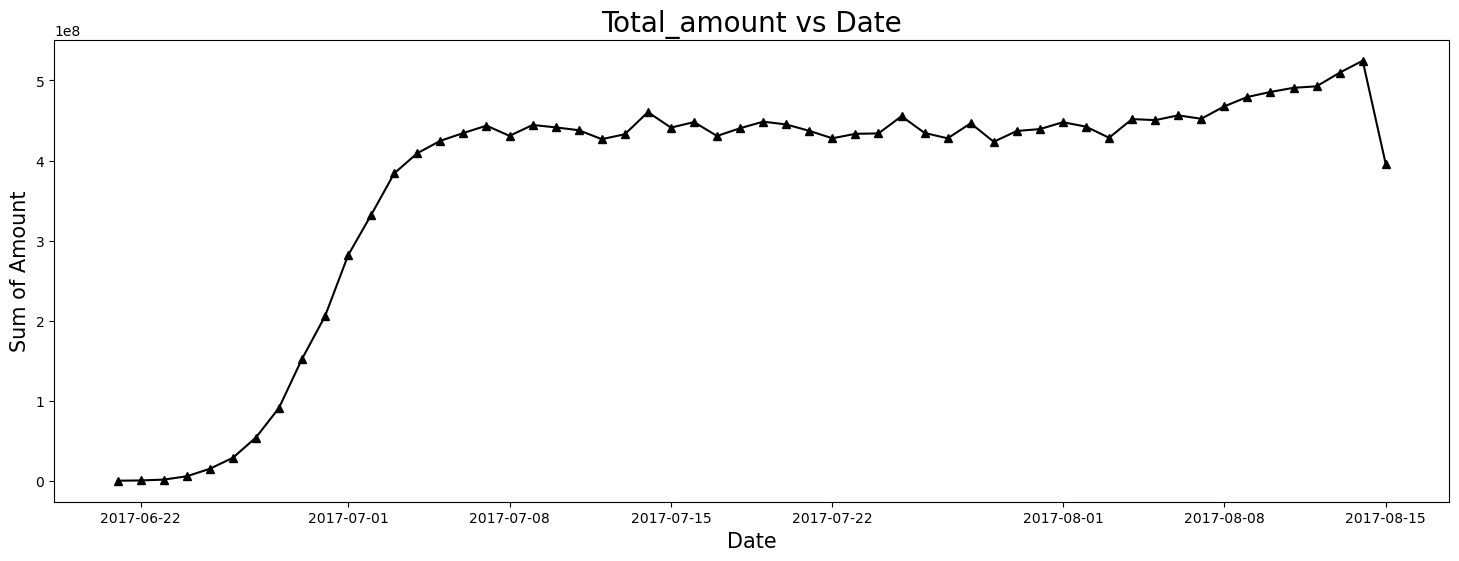

In [136]:
plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'],marker = '^',color = 'black')
plt.title("Total_amount vs Date", fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Sum of Amount',fontsize = 15)
plt.show()

#

**Q-3 : Calculate the average charges for each aircraft with different with different fare conditions??**

In [137]:
df = pd.read_sql_query("""SELECT fare_conditions,aircraft_code,avg(amount) AS avg_amount FROM ticket_flights 
                            JOIN flights ON ticket_flights.flight_id = flights.flight_id 
                            GROUP BY 2,1""",conn)
df

,fare_conditions,aircraft_code,avg_amount
0,Business,319,113550.56
1,Economy,319,38311.40
2,Business,321,34435.66
3,Economy,321,11534.97
4,Business,733,41865.63
5,Economy,733,13985.15
6,Business,763,82839.84
7,Economy,763,27594.72
8,Business,773,57779.91
9,Comfort,773,32740.55


<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

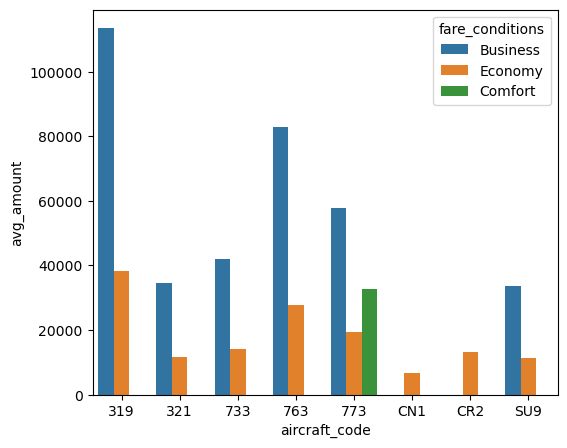

In [55]:
plt.figure(figsize = (6,5))
sns.barplot(data = df,x = 'aircraft_code',y = 'avg_amount',hue = 'fare_conditions')

#

# Analysing occupancy Rates

**For each aircraft calculate the total revenue per year and the avg revenue per ticket?**

In [64]:
pd.read_sql_query("""SELECT aircraft_code,ticket_count,total_revenue, total_revenue/ticket_count AS avg_revenue_per_ticket FROM 
                        (SELECT aircraft_code,count(*) as ticket_count, sum(amount) as total_revenue FROM  ticket_flights
                        JOIN flights on ticket_flights.flight_id = flights.flight_id 
                        GROUP BY 1)""",conn)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#

**Avg occupancy per aircraft ?**

In [117]:
occupancy_rates = pd.read_sql_query("""SELECT a.aircraft_code,avg(a.seats_count) as booked_seats,b.num_seats,avg(a.seats_count)/b.num_seats as occupancy_rates FROM
                        (SELECT aircraft_code,flights.flight_id, count(*) as seats_count FROM boarding_passes 
                        INNER JOIN flights
                        ON boarding_passes.flight_id = flights.flight_id
                        GROUP BY 1,2) AS a
                        INNER JOIN
                        (SELECT aircraft_code,count(*) as num_seats FROM seats
                        GROUP BY aircraft_code) AS b
                        ON a.aircraft_code =b.aircraft_code 
                        GROUP BY a.aircraft_code ORDER BY 4 DESC""", conn
                 )
occupancy_rates

,aircraft_code,booked_seats,num_seats,occupancy_rates
0,773,264.925806,402,0.659019
1,733,80.255462,130,0.617350
2,SU9,56.812113,97,0.585692
3,321,88.809231,170,0.522407
4,763,113.937294,222,0.513231
5,CN1,6.004431,12,0.500369
6,319,53.583181,116,0.461924
7,CR2,21.482847,50,0.429657


#

**By how much the Total Annual Turnover could increase by giving all aircraft a 10% higher occupancy rate ??**

In [125]:
occupancy_rates["Increased_occupancy_rate"] = occupancy_rates['occupancy_rates'] + occupancy_rates['occupancy_rates']*0.1
occupancy_rates

,aircraft_code,booked_seats,num_seats,occupancy_rates,Inc_occupancy_rate,Increased_occupancy_rate
0,773,264.93,402,0.66,0.72,0.72
1,733,80.26,130,0.62,0.68,0.68
2,SU9,56.81,97,0.59,0.64,0.64
3,321,88.81,170,0.52,0.57,0.57
4,763,113.94,222,0.51,0.56,0.56
5,CN1,6.00,12,0.50,0.55,0.55
6,319,53.58,116,0.46,0.51,0.51
7,CR2,21.48,50,0.43,0.47,0.47


In [121]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code,sum(amount) AS total_revenue FROM ticket_flights
                                    JOIN
                                    flights ON ticket_flights.flight_id = flights.flight_id
                                    GROUP BY aircraft_code""",conn)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [127]:
#Display all float number upto 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

In [126]:
occupancy_rates['Increased_occupancy_rate'] = (total_revenue['total_revenue']/occupancy_rates['occupancy_rates'])*occupancy_rates['Increased_occupancy_rate']
occupancy_rates

,aircraft_code,booked_seats,num_seats,occupancy_rates,Inc_occupancy_rate,Increased_occupancy_rate
0,773,264.93,402,0.66,0.72,2976779410.00
1,733,80.26,130,0.62,0.68,1801980510.00
2,SU9,56.81,97,0.59,0.64,1569207310.00
3,321,88.81,170,0.52,0.57,4808404810.00
4,763,113.94,222,0.51,0.56,3774326050.00
5,CN1,6.00,12,0.50,0.55,106011180.00
6,319,53.58,116,0.46,0.51,2181036550.00
7,CR2,21.48,50,0.43,0.47,5625933170.00
